Import packages

In [1]:
import tensorflow as tf
import create_dataset
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define generic functions to visualize data

In [2]:
def showImage(im):
    if (im.shape[2] == 1):
        im = im[:, :, 0]
    plt.imshow(im)
    plt.show()

Define generic functions to initialize weight/bias variables, and to define common convolution and pooling operations

In [3]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial, name='weights')

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial, name='biases')

In [4]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

Define the network architecture + loss function and metrics

In [11]:
# Input/Output placeholders
x = tf.placeholder(tf.float32, shape=[None, 28, 28, 1], name='input')
y_ = tf.placeholder(tf.float32, shape=[None, 2], name='output')

num_fc_layers = 10
print x_image.shape

# Layer 1
with tf.name_scope('1/Conv'):
    W_conv1 = weight_variable([3, 3, 1, 32])
    b_conv1 = bias_variable([32])
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

print h_pool1.shape

# Layer 2
with tf.name_scope('2/Conv'):
    W_conv2 = weight_variable([3, 3, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

print h_pool2.shape

layers = [tf.reshape(h_pool2, [-1, 7*7*64])]
keep_prob = tf.placeholder(tf.float32)
prev_layer_size = 7*7*64                     
# Create FC layers
for i in range(0, num_fc_layers):
    with tf.name_scope('{}/FC'.format(i)):
        W_fc = weight_variable([prev_layer_size, 1024])
        b_fc = bias_variable([1024])
        h_fc = tf.nn.relu(tf.matmul(layers[-1], W_fc) + b_fc)
        h_fc_drop = tf.nn.dropout(h_fc, keep_prob)
        layers.append(h_fc_drop)
        prev_layer_size = 1024

# Readout
with tf.name_scope('5/Readout'):
    W_fc2 = weight_variable([1024, 2])
    b_fc2 = bias_variable([2])
    y_conv = tf.matmul(layers[-1], W_fc2) + b_fc2

# Define loss
l2_loss = tf.reduce_mean(
    tf.nn.l2_loss(tf.subtract(y_conv, y_)))
train_step = tf.train.AdamOptimizer(1e-3).minimize(l2_loss)

(?, 28, 28, 1)
(?, 14, 14, 32)
(?, 7, 7, 64)


Train the network per-batch

step 0, training loss 3.81957e+11
step 10, training loss 8.38303e+09
step 20, training loss 6.74443e+08
step 30, training loss 4.74962e+07
step 40, training loss 7.1082e+07
step 50, training loss 3.65452e+07
step 60, training loss 2.28263e+07
step 70, training loss 1.58237e+06
step 80, training loss 1.66361e+06
step 90, training loss 1.66093e+06


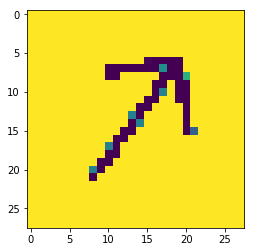

True angle: 54
True sin/cos: [ 0.80901699  0.58778525]
Predicted angle: [ 235.0390625    39.48046875]


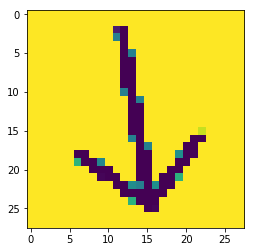

True angle: 279
True sin/cos: [-0.98768834  0.15643447]
Predicted angle: [ 149.328125   166.4765625]


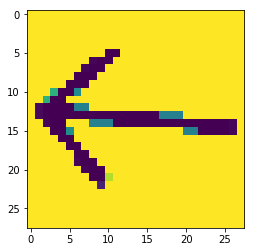

True angle: 175
True sin/cos: [ 0.08715574 -0.9961947 ]
Predicted angle: [  40.42773438  269.34179688]


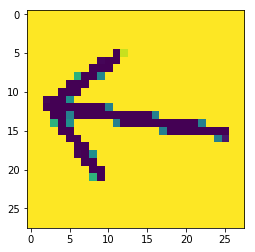

True angle: 171
True sin/cos: [ 0.15643447 -0.98768834]
Predicted angle: [ 191.59375     289.79003906]


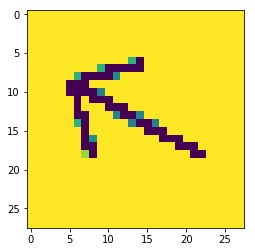

True angle: 151
True sin/cos: [ 0.48480962 -0.87461971]
Predicted angle: [ 62.46484375  99.15625   ]


In [9]:
batch_size = 100
logging_frequency = 10
iterations = 100

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(iterations):
    batch = create_dataset.generate_data(batch_size)
    if i % logging_frequency == 0:
      loss = sess.run(l2_loss, feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0}) 
      print('step %d, training loss %g' % (i, loss/batch_size))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
    
  visualization_size = 5
  vis_batch = create_dataset.generate_data(visualization_size)
  output = sess.run(y_conv, feed_dict={x: vis_batch[0], y_: vis_batch[1], keep_prob: 1.0})
  for i in range(visualization_size):
    showImage(vis_batch[0][i])
    print ("True angle: " + str(vis_batch[2][i][0]))
    print ("True sin/cos: " + str(vis_batch[1][i]))
    print ("Predicted angle: " + str((output[i]*180/math.pi)%360))